#                             Detection of Malaria  🦟🦠

### INTRODUCTION

Malaria is a life-threatening disease. It’s typically transmitted through the bite of an infected anopheles mosquito. Infected mosquitoes carry the plasmodium parasite. When this mosquito bites you, the parasite is released into your bloodstream. It is considered as an endemic in many parts of the world.

Malaria detection is performed by examining a drop of the patient’s blood, spread out as a “blood smear” (red blood cell) on a microscope slide. This blog focuses on improving malaria detection from such patches segmented from the microscopic images of blood smears by introducing a deep convolutional neural network. Compared to the traditional methods that use tedious hand engineering feature extraction, the proposed method uses deep learning in an end-to-end arrangement that performs both feature extraction and classification directly from the raw segmented patches of the red blood smears. 

### Risk Factor:
Malaria is commonly associated with poverty and has a major negative effect on economic development. In Africa, it is estimated to result in losses of US$12 billion a year due to increased healthcare costs, lost ability to work, and negative effects on tourism.

### Symptoms of Malaria

A malaria infection is generally characterized by the following signs and symptoms:

- Fever
- Chills
- Headache
- Nausea and vomiting
- Muscle pain and fatigue

Other signs and symptoms may include:
- Sweating
- Chest or abdominal pain
- Cough

### How is Malaria diagnosed by pathologists?
Typically Malaria is diagnosed by microscopic examination of blood cells under the supervision of a pathologist. Red blood cells are examined using a microscope using blood films. The pathologists tries to find evidence of Malaria using past domain knowledge. Typically, when a cell is infected with Malaria one can see distorted cell shapes which are also accompanied by certain blunt spots in the cell.

### PROBLEM STATEMENT
For malaria as well as other microbial infections, manual inspection of thick and thin blood smears by trained microscopists remains the gold standard for parasite detection and stage determination because of its low reagent and instrument cost and high flexibility. Despite manual inspection being extremely low throughput and susceptible to human bias, automatic counting software remains largely unused because of the wide range of variations in brightfield microscopy images. However, a robust automatic counting and cell classification solution would provide enormous benefits due to faster and more accurate quantitative results without human variability; researchers and medical professionals could better characterize stage-specific drug targets and better quantify patient reactions to drugs.

### Steps to solve the problem :-
- Importing Libraries.
- Loading the data.
- Data preprocessing.
- Data augmentation.
- Ploting images and its labels to understand how does an infected cell and uninfected cell looks like.
- Spliting data in Train , Evaluation and Test set.
- Creating a Convolution Neural Network function.
- Wrapping it with Tensorflow Estimator function.
- Training the data on Train data.
- Evaluating on evaluation data.
- Predicting on Test data
- Ploting the predicted image and its respective True value and predicted value.

### Information about the dataset.
The dataset is downloaded from Kaggle from this link — https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria. The dataset was originally taken from the NIH website and uploaded to a Kaggle repository. The dataset contains 27558 cell images. Out of these 27558 images, we have 13779 cell images which are infected by Malaria and an other 13779 images which are uninfected.

# Exploratory Data Analysis

In [1]:
import os
import random

# Imports for Managing Datasets
import numpy as np
import pandas as pd

# Imports for Data Visualization
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [2]:
# Directory for Parasitized cell images
parasitize_images_dir = '../Malaria_detection/cell_images/Parasitized'

# Directory for Uninfected cell images
uninfected_images_dir = '../Malaria_detection/cell_images/Uninfected'

In [3]:
# lets take a look at the number of images of parasitized cells
parasitize_images_dir = os.listdir(parasitize_images_dir)
len(parasitize_images_dir)

13780

In [4]:
# lets take a look at the number of images of uninfected cells
uninfected_images_dir = os.listdir(uninfected_images_dir)
len(uninfected_images_dir)

13780

## Parasitized Images

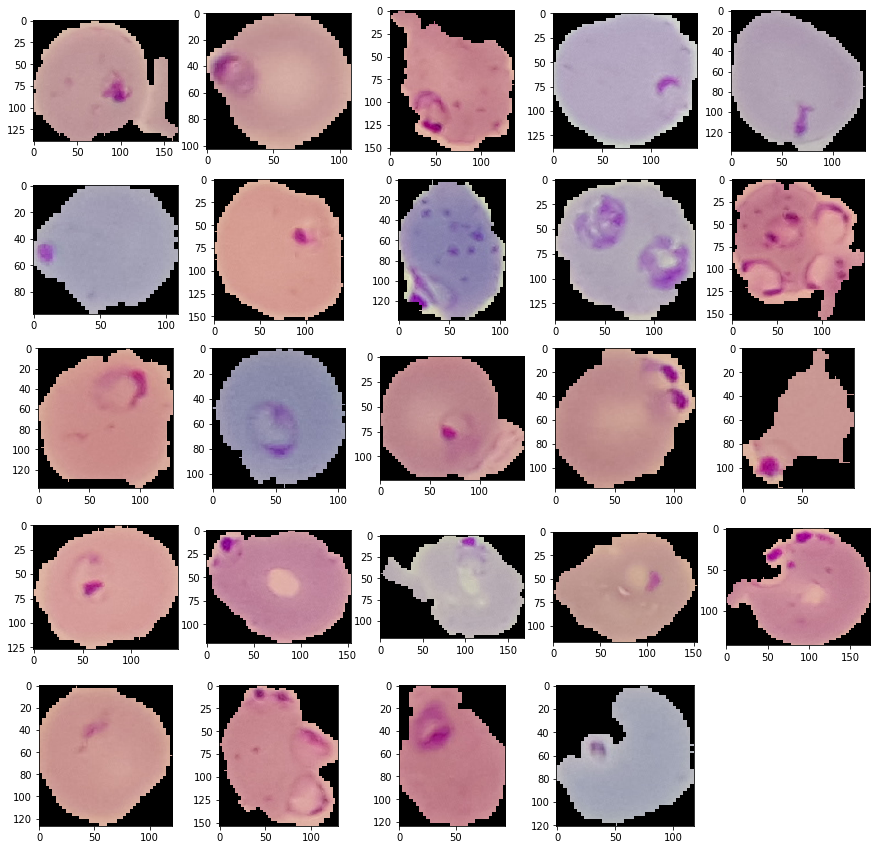

In [5]:
# lets see a variety of parasitized cells
filenames = random.sample(os.listdir('../Malaria_detection/cell_images/Parasitized') , 25)

# here we will see 25 images of Parasitized cell images
plt.figure(figsize=(15, 15))  # figure size
for i in range(1, len(filenames)):
    row = i
    image = imread('../Malaria_detection/cell_images/Parasitized/' + filenames[i])
    plt.subplot(5, 5, row)
    plt.imshow(image)
plt.show()

## Uninfected Images

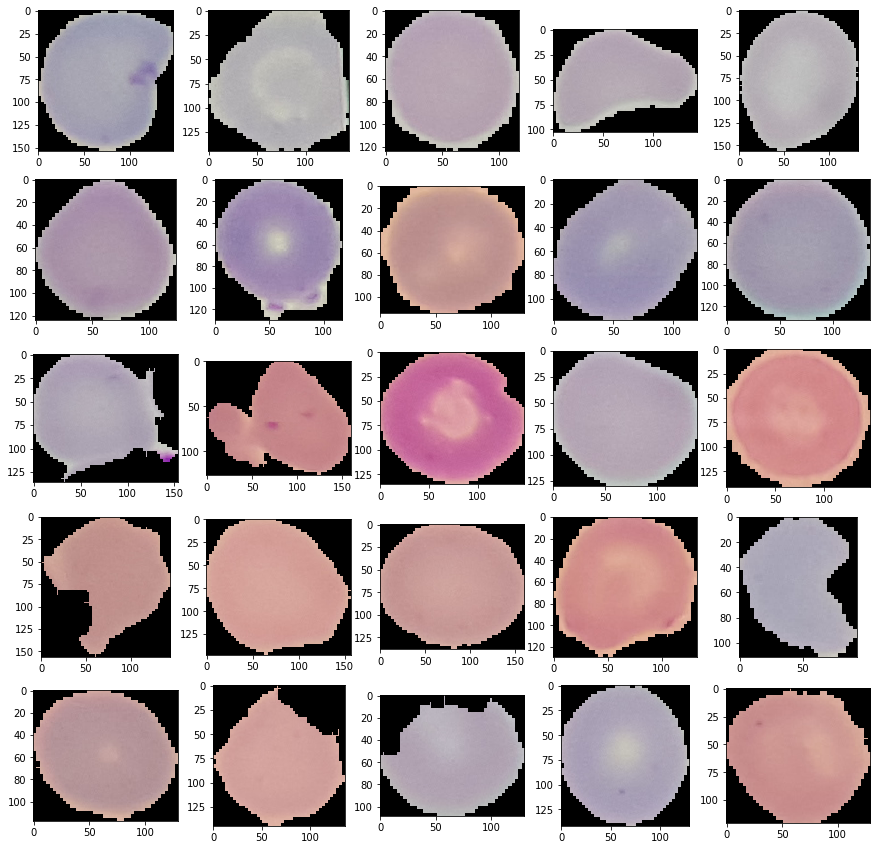

In [6]:
# lets see a variety of uninfected cells
filenames_ = random.sample(os.listdir('../Malaria_detection/cell_images/Uninfected'), 26)

# here we will see 25 images of Uninfected cell images
plt.figure(figsize=(15, 15))
for i in range(1, len(filenames_)):
    row = i
    image = imread('../Malaria_detection/cell_images/Uninfected' + '/' + filenames_[i])
    plt.subplot(5, 5, row)
    plt.imshow(image)
plt.show()

## One can clearly see the difference between the infected and uninfected. You can observe a small clot inside the cellular image for infected while for the uninfected the cellular image is clean without any clots.

### Lets take a look at single cell

#### Parasitized Cell

In [7]:
# lets write the directory of a single Parasitized cell and take a look at it using imread
para_cell = '../Malaria_detection/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'
para_cell

'../Malaria_detection/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'

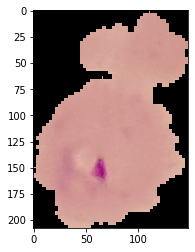

In [8]:
plt.imshow(imread(para_cell))

#### Uninfected Cell

In [9]:
# lets write the directory of a single Uninfected cell and take a look at it using imread
uninfected_cell = '../Malaria_detection/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_25.png'
uninfected_cell

'../Malaria_detection/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_25.png'

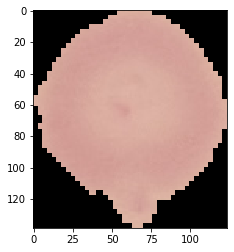

In [10]:
plt.imshow(imread(uninfected_cell))

### Jointplot 

#### Parasitized Cell Images

In [11]:
dim1_ = []
dim2_ = []

for image_filename in os.listdir('../Malaria_detection/cell_images/Parasitized'):
    if 'Thumbs.db' not in image_filename: 
        img = imread('../Malaria_detection/cell_images/Parasitized/' + image_filename)
        d1,d2,colors = img.shape
        dim1_.append(d1)
        dim2_.append(d2)

# 'thumbs.db' files are database files containing the small images displayed when you view a folder in Thumbnail view
# we will have to remove them

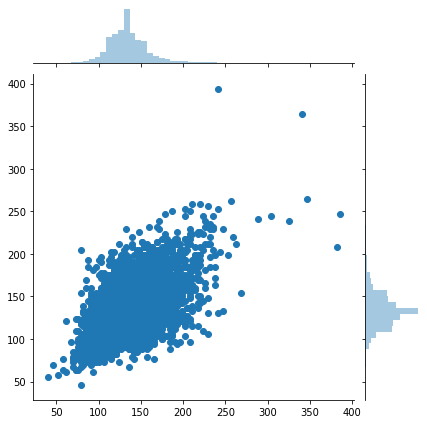

In [12]:
sns.jointplot(dim1_,dim2_)

#### Uninfected Cell Images

In [13]:
dim1 = []
dim2 = []

for image_filename in os.listdir('../Malaria_detection/cell_images/Uninfected'):
    if 'Thumbs.db' not in image_filename:
        img = imread('../Malaria_detection/cell_images/Uninfected/' + image_filename)
        d1,d2,colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

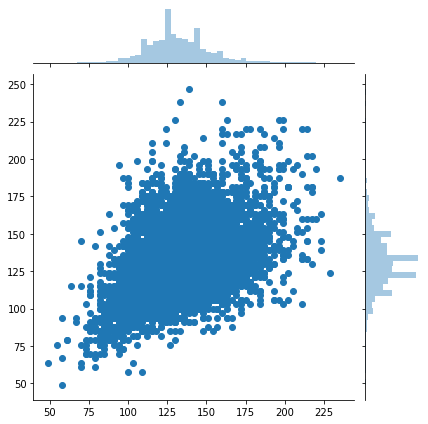

In [14]:
sns.jointplot(dim1,dim2)